#Objetivo

En este notebook veremos todos los pasos necesarios para clasificar si una persona entrará en default (no pagará) un préstamo. 

Que un individuo (o empresa, asociación, etc.) entre en **default** quiere decir que falló en pagar su deuda. Predecir a los individuos con mayor probabilidad de entrar en este estado, ayuda a planear estrategias sobre las inversiones que se realizarán (préstamos en este caso).

Estos pasos comprenden:

1. Obtención de los datos
2. Limpieza y preparación de los datos
    1. Valores nulos
    2. Tipos de variables

El propósito de la limpieza y preparación de los datos, es conseguir un DataFrame (o matriz) que podamos usar en el algoritmo. 



# Dependencias

In [ ]:
!pip install -U plotly

In [ ]:
from pprint import pprint

import pandas as pd
import numpy as np

import plotly.express as px

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix

# Datos

Trabajaremos con datos del Lending Club.

Lending Club es una plataforma de préstamos entre pares (P2P), donde los prestatarios envían sus solicitudes de préstamo y los prestamistas individuales seleccionan las solicitudes que desean financiar. Los prestatarios reciben el monto total del préstamo emitido menos la tarifa inicial, que se paga a la empresa. Los inversores compran notas respaldadas por préstamos personales y pagan a Lending Club una tarifa de servicio.

Los préstamos P2P reducen el costo de los préstamos personales en comparación con el financiamiento tradicional al conectar directamente a los prestatarios e inversores. Sin embargo, siempre existe el riesgo de invertir en un préstamo incobrable. De hecho, la tasa de incumplimiento de los préstamos P2P es mucho más alta que la de los préstamos tradicionales. Por lo tanto, la industria crediticia está muy interesada en brindar a los inversionistas una evaluación integral del riesgo de las solicitudes de préstamo. La empresa comparte datos sobre todas las solicitudes de préstamos realizadas a través de su plataforma.

Mas información de los datos puede encontrarse [aqui](https://www-2.rotman.utoronto.ca/~hull/mlbook/mlindex1.html).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Cruso-ApsFinancieras/semana1/'
sep= "\n-------------------\n"

In [ ]:
info_etiquetas = pd.read_excel(path + 'lendingclub_datadictionary.xlsx', index_col=0)

In [ ]:
info_etiquetas

,Description
column_name,
id,A unique LC assigned ID for the loan listing.
member_id,A unique LC assigned Id for the borrower member.
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
...,...
settlement_status,The status of the borrower’s settlement plan. ...
settlement_date,The date that the borrower agrees to the settl...
settlement_amount,The loan amount that the borrower has agreed t...


In [ ]:
data_raw = pd.read_excel(path +"lending_clubFull_Data_Set.xlsx", index_col=0)
data_raw

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,263591,545710,20000.0,60 months,17.93,342.94,E,E5,Wylie ISD,1 year,...,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN
1,1613916,69664096,30000.0,36 months,11.99,996.29,C,C1,Sergeant,10+ years,...,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN
2,818934,8965180,21500.0,36 months,11.99,714.01,B,B3,Designer,1 year,...,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN
3,1606612,70572960,10000.0,36 months,13.67,340.18,C,C3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN
4,1639932,68589517,5000.0,36 months,8.49,157.82,B,B1,Sr. Manufacturing Engineer,10+ years,...,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,901888,4974773,10500.0,36 months,10.16,339.60,B,B1,Schneider Electric,5 years,...,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN
24996,945413,1279809,12000.0,36 months,14.33,412.06,C,C1,Clark County School District,10+ years,...,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN
24997,366944,63496281,25000.0,36 months,12.69,838.63,C,C2,sales consultant,< 1 year,...,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN
24998,1043529,98124387,12200.0,60 months,13.49,280.66,C,C2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN


In [ ]:
print(f'El DataFrame de caracteristicas numéricas tiene forma {data_raw.shape}')

El DataFrame de caracteristicas numéricas tiene forma (25000, 134)


In [ ]:
# Método para obtener información de nuestros datos
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 0 to 24999
Columns: 134 entries, id to settlement_term
dtypes: datetime64[ns](9), float64(100), int64(1), object(24)
memory usage: 25.7+ MB


In [ ]:
# Solo aplica a los datos numéricos
data_raw.describe()

,id,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,2.500000e+04,24999.000000,24999.000000,24999.000000,2.499900e+04,24988.00000,24998.000000,24999.000000,24999.000000,24998.000000,...,96.0,96.000000,96.0,96.000000,80.000000,96.000000,96.000000,195.000000,195.000000,195.000000
mean,8.261669e+05,14687.002480,13.218843,436.788993,7.706611e+04,18.61075,0.337747,695.570623,699.570903,0.615329,...,3.0,164.741563,3.0,11.729167,478.390875,12137.975937,205.064167,5090.933897,49.107231,9.866667
std,4.788021e+05,8763.621362,4.741118,256.009134,5.497013e+04,14.04028,0.910338,31.257024,31.258367,0.924112,...,0.0,132.594448,0.0,10.627154,398.241797,7267.918916,221.171394,3745.739394,7.307528,8.924810
min,6.000000e+00,600.000000,5.320000,21.590000,0.000000e+00,0.00000,0.000000,640.000000,644.000000,0.000000,...,3.0,12.760000,3.0,0.000000,38.280000,2058.660000,0.030000,350.410000,26.140000,0.000000
25%,4.085615e+05,8000.000000,9.760000,251.580000,4.600000e+04,12.06000,0.000000,670.000000,674.000000,0.000000,...,3.0,65.145000,3.0,0.000000,185.662500,5943.522500,34.945000,2116.230000,45.000000,1.000000
50%,8.244205e+05,12725.000000,12.740000,377.620000,6.500000e+04,17.81000,0.000000,690.000000,694.000000,0.000000,...,3.0,141.370000,3.0,12.000000,413.190000,11252.130000,134.610000,4197.000000,49.990000,11.000000
75%,1.243292e+06,20000.000000,15.990000,577.035000,9.200000e+04,24.27000,0.000000,710.000000,714.000000,1.000000,...,3.0,229.022500,3.0,22.000000,663.592500,16200.975000,306.720000,6770.455000,50.045000,18.000000
max,1.646774e+06,40000.000000,30.990000,1501.000000,1.500000e+06,999.00000,20.000000,845.000000,850.000000,15.000000,...,3.0,769.400000,3.0,30.000000,2308.200000,32051.760000,1062.930000,18957.920000,74.880000,36.000000


In [ ]:
# Método que nos da los primeros 5 elementos del DataFrame
data_raw.head()

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,263591,545710,20000.0,60 months,17.93,342.94,E,E5,Wylie ISD,1 year,...,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN
1,1613916,69664096,30000.0,36 months,11.99,996.29,C,C1,Sergeant,10+ years,...,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN
2,818934,8965180,21500.0,36 months,11.99,714.01,B,B3,Designer,1 year,...,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN
3,1606612,70572960,10000.0,36 months,13.67,340.18,C,C3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN
4,1639932,68589517,5000.0,36 months,8.49,157.82,B,B1,Sr. Manufacturing Engineer,10+ years,...,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN


In [ ]:
data_raw.head(10)

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,263591,545710,20000.0,60 months,17.93,342.94,E,E5,Wylie ISD,1 year,...,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN
1,1613916,69664096,30000.0,36 months,11.99,996.29,C,C1,Sergeant,10+ years,...,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN
2,818934,8965180,21500.0,36 months,11.99,714.01,B,B3,Designer,1 year,...,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN
3,1606612,70572960,10000.0,36 months,13.67,340.18,C,C3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN
4,1639932,68589517,5000.0,36 months,8.49,157.82,B,B1,Sr. Manufacturing Engineer,10+ years,...,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN
5,756884,107370446,16150.0,60 months,30.74,529.88,F,F5,Meat and produce unloader,10+ years,...,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN
6,1251123,114228157,18400.0,36 months,14.08,629.59,C,C3,Owner,8 years,...,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN
7,15172,35511139,17350.0,60 months,12.39,389.37,C,C1,Dual Rate Pit manager,9 years,...,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN
8,1503361,91060858,35000.0,36 months,12.79,1175.76,C,C1,Business Manaer,9 years,...,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN
9,966958,1454308,9325.0,36 months,10.16,301.60,B,B1,Glynn County Board of Education,5 years,...,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN


**Localizar elementos en nuestros DataFrame**

*   método .iloc[ ] : Toma solo enteros para buscar la ubicación
*   método .loc[ ] : Puede tomar enteros y cadenas para localizar elementos

In [ ]:
# Localizar datos puntuales
print(data_raw.loc[3, 'loan_amnt'])
print(data_raw.iloc[3, 2])

10000.0
10000.0


In [ ]:
# Tambien podemos pedir subconjuntos de los datos
data_raw.loc[2:5, 'member_id':'int_rate']

,member_id,loan_amnt,term,int_rate
2,8965180,21500.0,36 months,11.99
3,70572960,10000.0,36 months,13.67
4,68589517,5000.0,36 months,8.49
5,107370446,16150.0,60 months,30.74


In [ ]:
# Como funcionan los rangos numéricos en numpy
rango = np.arange(0,3)
for numero in rango:
  print(numero)

0.0
0.5
1.0
1.5
2.0
2.5


In [ ]:
# Usando el método "iloc" es ligeramente diferente al método "loc"
data_raw.iloc[2:6, 1:5]

,member_id,loan_amnt,term,int_rate
2,8965180,21500.0,36 months,11.99
3,70572960,10000.0,36 months,13.67
4,68589517,5000.0,36 months,8.49
5,107370446,16150.0,60 months,30.74


Filtrar un DataFrame por alguna condicion

In [ ]:
# Creemos un DataFrame para pequeñas pruebas
dicti = {'a':[1,2,np.nan,4,5], 'b':[12,np.nan,np.nan,45,5], 'c':['as','ad','af','ac','ag']}
df = pd.DataFrame(dicti)
df

,a,b,c
0,1.0,12.0,as
1,2.0,NaN,ad
2,NaN,NaN,af
3,4.0,45.0,ac
4,5.0,5.0,ag


In [ ]:
# Varios metodos para obtener información, ".isnull()", ".count()", ".mean()", ".sum()"
df.isnull()

,a,b,c
0,False,False,False
1,False,True,False
2,True,True,False
3,False,False,False
4,False,False,False


In [ ]:
# Notemos algo al pedir su info, por ser un DataFrame pequeño
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       4 non-null      float64
 1   b       3 non-null      float64
 2   c       5 non-null      object 
dtypes: float64(2), object(1)
memory usage: 248.0+ bytes


In [ ]:
# Pedimos una condición para que nos devuelva un DataFrame con los datos que la cumple
condicion = df['b'] > 6
df_condicionado = df[condicion]
df_condicionado

,a,b,c
0,1.0,12.0,as
3,4.0,45.0,ac


Agregar datos a DataFrame

In [ ]:
dicti2 = {'a':[1,4,5], 'e':[0, 0, 0], 'f':['bs','bd','bf']}
df2 = pd.DataFrame(dicti2)
df2

,a,e,f
0,1,0,bs
1,4,0,bd
2,5,0,bf


Método Concat en DataFrames

In [ ]:
concat_abajo = pd.concat([df, df2])
concat_abajo

,a,b,c,e,f
0,1.0,12.0,as,NaN,NaN
1,2.0,NaN,ad,NaN,NaN
2,NaN,NaN,af,NaN,NaN
3,4.0,45.0,ac,NaN,NaN
4,5.0,5.0,ag,NaN,NaN
0,1.0,NaN,NaN,0.0,bs
1,4.0,NaN,NaN,0.0,bd
2,5.0,NaN,NaN,0.0,bf


In [ ]:
concat_lado = pd.concat([df, df2], axis=1)
concat_lado

,a,b,c,a,e,f
0,1.0,12.0,as,1.0,0.0,bs
1,2.0,NaN,ad,4.0,0.0,bd
2,NaN,NaN,af,5.0,0.0,bf
3,4.0,45.0,ac,NaN,NaN,NaN
4,5.0,5.0,ag,NaN,NaN,NaN


Función "merge" (combinar) para DataFrames

In [ ]:
# Merge en DataFrames

combinado = df.merge(df2, how='left')   # Podemos agregar un 'left' en como unir
combinado

,a,b,c,e,f
0,1.0,12.0,as,0.0,bs
1,2.0,NaN,ad,NaN,NaN
2,NaN,NaN,af,NaN,NaN
3,4.0,45.0,ac,0.0,bd
4,5.0,5.0,ag,0.0,bf


Método "drop" para deshacernos de columnas o índices

In [ ]:
df

,a,b,c
0,1.0,12.0,as
1,2.0,NaN,ad
2,NaN,NaN,af
3,4.0,45.0,ac
4,5.0,5.0,ag


In [ ]:
prueba1 = df.copy()

prueba1.drop(columns=['b','c'], inplace=True)
prueba1

,a
0,1.0
1,2.0
2,NaN
3,4.0
4,5.0


In [ ]:
prueba2 = df.copy()
prueba2.drop(index=[1, 4], inplace=True)
prueba2

,a,b,c
0,1.0,12.0,as
2,NaN,NaN,af
3,4.0,45.0,ac


**Porcentaje de valores nulos por columna**

Ilustraremos con el siguiente ejemplo utilizando nuestro DataFrame de pruebas

In [ ]:
df

,a,b,c
0,1.0,12.0,as
1,2.0,NaN,ad
2,NaN,NaN,af
3,4.0,45.0,ac
4,5.0,5.0,ag


In [ ]:
(True + True + False + False + True)/5

0.6

In [ ]:
# Solo nos quedaremos con las columnas que tienen menos de 15% de valores NaN
null_val = df.isnull().mean()
print(null_val)
null_columns = null_val[null_val > 0.15] 
print(null_columns)

a    0.2
b    0.4
c    0.0
dtype: float64
a    0.2
b    0.4
dtype: float64


Otro modo de ver los datos faltantes

In [ ]:
na_values = (data_raw.isna().sum().sort_values() / len(data_raw)).reset_index(name = 'n')
na_values

,index,n
0,id,0.00000
1,member_id,0.00000
2,initial_list_status,0.00004
3,last_fico_range_low,0.00004
4,revol_bal,0.00004
...,...,...
129,hardship_status,0.99616
130,hardship_reason,0.99616
131,hardship_type,0.99616
132,deferral_term,0.99616


In [ ]:
# Modificacion pendiente (como ver la etiquetas)
info_etiquetas.loc['hardship_type', 'Description']

'Describes the hardship plan offering'

In [ ]:
px.bar(na_values, "index", "n")

In [ ]:
data_filt = data_raw.loc[:, data_raw.columns[na_values.n < .1]]
data_filt

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq
0,263591,545710,20000.0,60 months,17.93,342.94,E,E5,Wylie ISD,1 year,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1613916,69664096,30000.0,36 months,11.99,996.29,C,C1,Sergeant,10+ years,...,42.6,0.0,0.0,132.0,147.0,21.0,6.0,3.0,40.0,7.0
2,818934,8965180,21500.0,36 months,11.99,714.01,B,B3,Designer,1 year,...,66.8,0.0,0.0,169.0,166.0,17.0,8.0,2.0,23.0,NaN
3,1606612,70572960,10000.0,36 months,13.67,340.18,C,C3,NaN,NaN,...,50.9,0.0,0.0,54.0,387.0,3.0,3.0,1.0,3.0,8.0
4,1639932,68589517,5000.0,36 months,8.49,157.82,B,B1,Sr. Manufacturing Engineer,10+ years,...,92.6,0.0,0.0,59.0,97.0,14.0,14.0,1.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,901888,4974773,10500.0,36 months,10.16,339.60,B,B1,Schneider Electric,5 years,...,78.3,0.0,0.0,115.0,183.0,24.0,8.0,4.0,33.0,NaN
24996,945413,1279809,12000.0,36 months,14.33,412.06,C,C1,Clark County School District,10+ years,...,59.8,0.0,0.0,211.0,183.0,1.0,1.0,0.0,14.0,NaN
24997,366944,63496281,25000.0,36 months,12.69,838.63,C,C2,sales consultant,< 1 year,...,58.7,0.0,0.0,136.0,226.0,2.0,2.0,4.0,51.0,NaN
24998,1043529,98124387,12200.0,60 months,13.49,280.66,C,C2,NaN,NaN,...,59.7,0.0,0.0,141.0,177.0,8.0,6.0,0.0,8.0,NaN


In [ ]:
print("Datos originales\n")
print(data_raw.dtypes.value_counts())
print(sep)
print("Datos filtrado\n")
data_filt.dtypes.value_counts()

Datos originales

float64           100
object             24
datetime64[ns]      9
int64               1
dtype: int64

-------------------

Datos filtrado



float64           54
object            18
datetime64[ns]     3
int64              1
dtype: int64

# Preparando datos para entrenamiento

In [ ]:
dicti_nombres = {'nombres':['Max', 'Alfonso', 'Juan', 'María', 'Luisa'], 'edad':[12,39,40,45,5]}
df_nombres = pd.DataFrame(dicti_nombres)
df_nombres

,nombres,edad
0,Max,12
1,Alfonso,39
2,Juan,40
3,María,45
4,Luisa,5


In [ ]:
nombres_a_obj = {
    "Max": 'H', 
    "Alfonso": 'H', 
    "Juan": 'H', 
    "María": 'M', 
    "Luisa": 'M', 
}

y_nombres = df_nombres.nombres.map(nombres_a_obj)

In [ ]:
y_nombres

0    H
1    H
2    H
3    M
4    M
Name: nombres, dtype: object

In [ ]:
data_filt.loan_status.value_counts(dropna = False)

Current                                                12063
Fully Paid                                              9733
Charged Off                                             2557
Late (31-120 days)                                       336
In Grace Period                                          174
Late (16-30 days)                                        101
Does not meet the credit policy. Status:Fully Paid        28
Does not meet the credit policy. Status:Charged Off        5
Default                                                    2
NaN                                                        1
Name: loan_status, dtype: int64

In [ ]:
loan_status_to_objective = {
    "Current": 0, 
    "Fully Paid": 0, 
    "Charged Off": 1, 
    "Late (31-120 days)": 0, 
    "In Grace Period": 0, 
    "Late (16-30 days)": 0,  
    "Default": 1, 
}

X = data_filt.drop(columns=['loan_status'], axis=1)
y = data_filt.loan_status.map(loan_status_to_objective)

X = X[~y.isna()]
y = y[~y.isna()]
print(X.shape, y.shape)
y.dtype

(24966, 75) (24966,)


dtype('float64')

In [ ]:
eg = pd.Series([0,1,2,3,np.nan,4])
~eg.isna()

0     True
1     True
2     True
3     True
4    False
5     True
dtype: bool

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .7, random_state = 10)

In [ ]:
X_train.shape

(17476, 75)

# Análisis de las variables por tipo

In [ ]:
X_train.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64'), dtype('<M8[ns]')],
      dtype=object)

In [ ]:
columns_by_type = {
    'datetime[ns]': X.select_dtypes('<M8[ns]').columns,
    'float64':      X.select_dtypes('float64').columns,
    'int64':        X.select_dtypes('int64').columns,
    'object':       X.select_dtypes('object').columns
}
pprint(columns_by_type)

{'datetime[ns]': Index(['earliest_cr_line', 'next_pymnt_d', 'last_credit_pull_d'], dtype='object'),
 'float64': Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'annual_inc_joint', 'dti_joint', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_o

## Variables Numéricas


### Variables con poca variación

In [ ]:
var_filter = VarianceThreshold(threshold=.90)
var_filter.fit(X_train[columns_by_type['float64']])
constant_columns = [column for column in X_train[columns_by_type['float64']].columns
                    if column not in X_train[columns_by_type['float64']].columns[var_filter.get_support()]]
constant_columns

In [ ]:
X_train.drop(columns=constant_columns, inplace=True)
X_test.drop(columns=constant_columns, inplace=True)

columns_by_type['float64'] = columns_by_type['float64'].drop(constant_columns)

In [ ]:
scaler = StandardScaler()
data_num_sc = pd.DataFrame(scaler.fit_transform(X_train[columns_by_type['float64']]), columns = X_train[columns_by_type['float64']].columns, index = X_train[columns_by_type['float64']].index)
data_num_sc

### Variables con alta correlación

La **correlación** es una médida estadística que muestra la relación, ya sea causal o no, entre dos variables. La médida más usada es el **Coeficiente de Correlación de Pearson**. Para dos variables $X = (x_1, x_2, \dots, x_n)$ y $Y = (y_1, y_2, \dots, y_n)$,

$$\rho_{X, Y} = corr(X, Y) = \frac{cov(X, Y)}{\sigma_{X}\sigma_{Y}}$$ 

en donde $\sigma_{X}$ es la desviación estándar de $X$ y $$cov(X, Y) = \frac{1}{n-1}\sum_{i=1}^{n}(x_i - \mu_x)(y_i-\mu_y)$$
con $\mu_x$ la media de $X$.



https://www.maximaformacion.es/blog-dat/que-es-la-correlacion-estadistica-y-como-interpretarla/

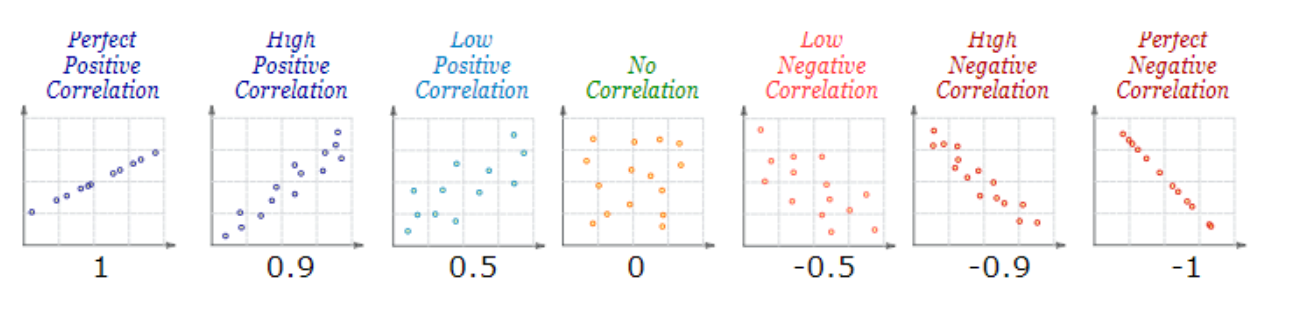

In [ ]:
numeric_to_remove = []

In [ ]:
# corr_df = X_train[columns_by_type['float64']].corr() # NOTA: Obtenemos la misma matriz de correlación con los datos sin escalar
corr_df = data_num_sc.corr()
px.imshow(corr_df, 
          labels=dict(color="Correlación"),
          x=corr_df.index, 
          y=corr_df.columns, 
          range_color=[-1, 1], 
          color_continuous_scale="oxy"
          )


In [ ]:
correlated_features = set()
for i in range(len(corr_df.columns)):
    for j in range(i):
        if abs(corr_df.iloc[i, j]) > 0.7:
            colname = corr_df.columns[i]
            correlated_features.add(colname)
len(correlated_features)

In [ ]:
correlated_features

In [ ]:
X_train.drop(columns=correlated_features, inplace=True)
X_test.drop(columns=correlated_features, inplace=True)

data_num_sc.drop(columns=correlated_features, inplace=True)
columns_by_type['float64'] = columns_by_type['float64'].drop(correlated_features)


## Fechas

Las fechas no las ocuparemos a menos en este análisis. Aunque cabe destacar que podrían ocupar si se transforman a otro tipo de dato (e.g. crear "número de días desde..." y obtener la nueva variable usando una diferencia en días entre fechas).

In [ ]:
for col in columns_by_type["datetime[ns]"]:
    print(data_filt[col].head(), sep)

In [ ]:
X_train.drop(columns=columns_by_type["datetime[ns]"], inplace=True)
X_test.drop(columns=columns_by_type["datetime[ns]"], inplace=True)

## Factores

Para poder usar factores en el modelo, es mecesario convertirlas a variables dummies. Esto es, considerando la siguiente variable:

estado_civil|
------------|
soltero
casado
soltero
soltero
viudo

Al obtener las variables dummies de esta obtendriamos:

estado_civil_soltero|estado_civil_casado|estado_civil_viudo
---|---|---
1|0|0
0|1|0
1|0|0
1|0|0
0|0|1

Incluso se puede quitar uno de los niveles y dejarlo como el estado base:

estado_civil_casado|estado_civil_viudo
---|---
0|0
1|0
0|0
0|0
0|1


Si nuestra variable tiene muchos niveles, el crear variables dummies de esta puede hacer que nuestro dataset crezca en dimensión, complicando el entrenamiento del modelo. Para estos casos, se puede buscar la posibilidad de unir distintos niveles en uno sólo o eliminar la variable.

In [ ]:
unique_values_by_column = X_train[columns_by_type["object"]].nunique().reset_index(name = "n")
unique_values_by_column

In [ ]:
px.bar(data_frame = unique_values_by_column, 
       x ="index", 
       y = "n", 
       title="Cantidad de niveles por factor", 
       labels={
           "index": "Nombre de la variable",
           "n": "Número de niveles"
           }
       )

Eliminamos las variables con más de 900 niveles.

In [ ]:
drop_columns = columns_by_type["object"][unique_values_by_column.n > 900].to_list()
drop_columns

In [ ]:
X_train.drop(columns=drop_columns, inplace=True)
X_test.drop(columns=drop_columns, inplace=True)

columns_by_type['object'] = columns_by_type['object'].drop(drop_columns)

In [ ]:
X_train

In [ ]:
X_train = pd.get_dummies(X_train, columns=columns_by_type['object'])
X_train